In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 13.9MB/s 
     |████████████████████████████████| 194kB 35.8MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *
import pathlib

In [3]:
reversal_stock_patterns = 'DoubleBottom','DoubleTop','FallingWedge','HeadAndShoulders','InverseHeadAndShoulders','RisingWedge'

In [4]:
path = Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/')
#url = "/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/"
#path = pathlib.Path(url)

In [5]:
fns = get_image_files(path)
fns

(#332) [Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/ABB.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/AbbVie.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/AIA생명.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/CSX.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/HDFC 은행.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/Iberdrola SA.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/KE Holdings Inc.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/네슬레.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/시스코.png'),Path('/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/RisingWedge/알리바바.png')...]

In [6]:
pattern = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = pattern.dataloaders(path)

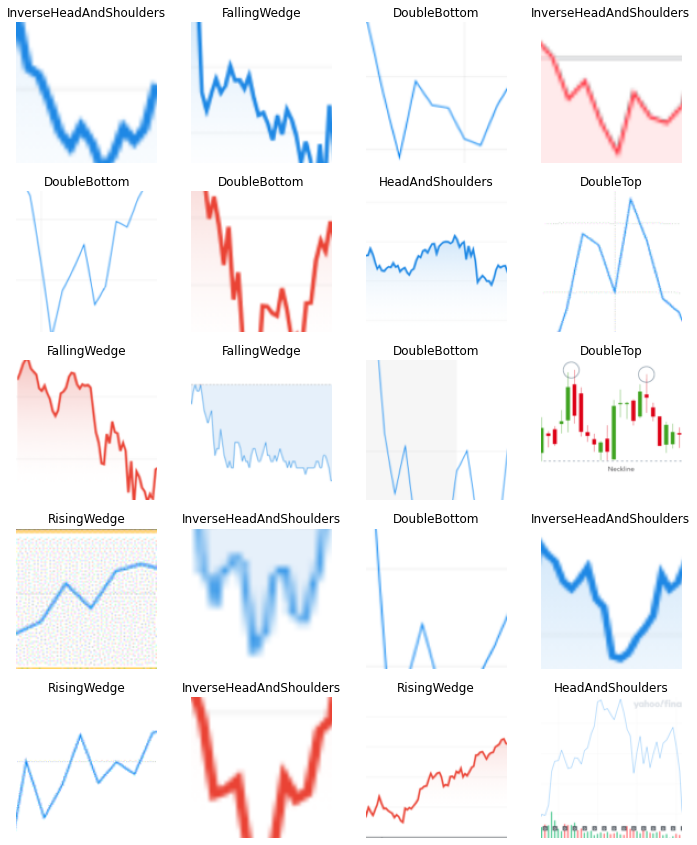

In [8]:
dls.valid.show_batch(max_n=20, nrows=5)

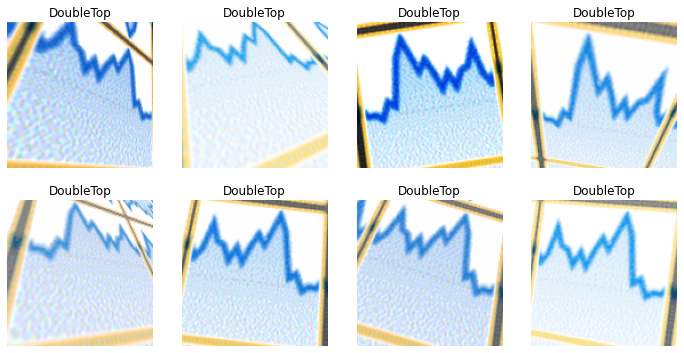

In [9]:
pattern = pattern.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pattern.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [10]:
pattern = pattern.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pattern.dataloaders(path)

In [70]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(80,1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,2.387420,3.513217,0.696970,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.428615,1.988114,0.545455,00:04
1,1.253772,1.640855,0.469697,00:04
2,1.084308,1.320460,0.439394,00:04
3,0.971422,1.583328,0.469697,00:04
4,0.852937,1.553959,0.409091,00:04
5,0.792235,1.244398,0.393939,00:05
6,0.736194,1.040487,0.333333,00:04
7,0.676807,1.215021,0.318182,00:04
8,0.617801,1.176220,0.318182,00:04
9,0.572615,1.292785,0.363636,00:04


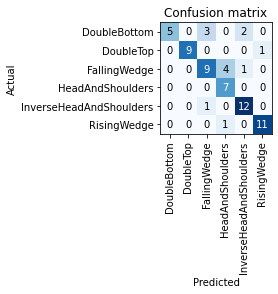

In [71]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=2.2908675418875646e-06)

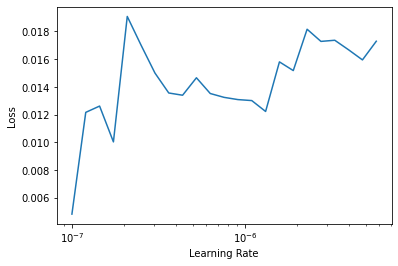

In [72]:
learn.lr_find()


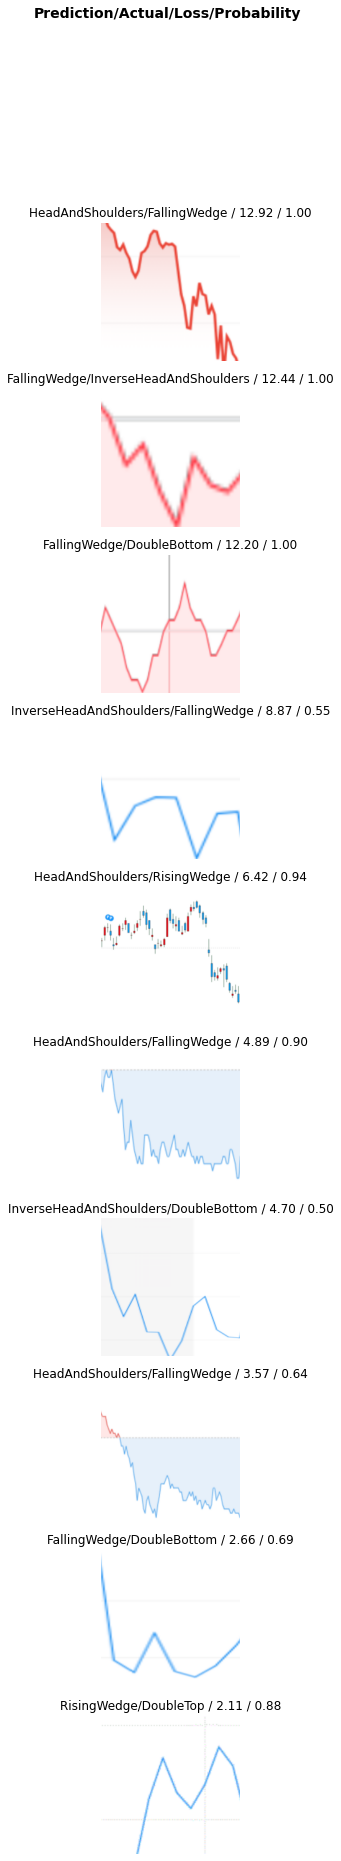

In [73]:
interp.plot_top_losses(10, nrows=10)

In [74]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [75]:
learn.export()

In [76]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [77]:
learn_inf = load_learner(path/'export.pkl')

In [78]:
learn_inf.dls.vocab

['DoubleBottom', 'DoubleTop', 'FallingWedge', 'HeadAndShoulders', 'InverseHeadAndShoulders', 'RisingWedge']

In [79]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [81]:
img = PILImage.create(btn_upload.data[-1])

In [82]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [83]:
pred,pred_idx,probs = learn_inf.predict(img)

In [84]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: RisingWedge; Probability: 0.9437')

In [85]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [86]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [87]:
btn_upload = widgets.FileUpload()

In [88]:
VBox([widgets.Label('Select your plant!'), 
      btn_upload, btn_run, out_pl, lbl_pred])